<h2 align="left"><font color=#854720>Let's get started:</font></h2>

<a id="import"></a>
# <p style="background-color:#9eb413; font-family:calibri; color: #854720; font-size:150%; text-align:center; border-radius:15px 50px;">Step 1 | Import Libraries</p>


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import plotly.express as px

In [ ]:
class colorss:
    yellows=['#ffffd4','#fee391','#fec44f','#fe9929','#d95f0e','#993404','#a70000','#ff5252','#ff7b7b','#ffbaba']
    greens=['#ffffd4','#fee391','#fec44f','#fe9929','#d9f0a3','#addd8e','#78c679','#41ab5d','#238443','#005a32']
cmaps=['flare','icefire','bwr_r','Accent','Spectral','RdGy','afmhot_r','afmhot','inferno','seismic','vlag','vlag_r']

<a id="read"></a>
# <p style="background-color:#9eb413 ; font-family:calibri; color:#854720; font-size:150%; text-align:center; border-radius:15px 50px;">Step 2 | Read Dataset</p>


In [ ]:
df=pd.read_csv("yield_df.csv")

In [ ]:
df

Unnamed: 0      Area            Item  Year  hg/ha_yield  \
0               0   Albania           Maize  1990        36613   
1               1   Albania        Potatoes  1990        66667   
2               2   Albania     Rice, paddy  1990        23333   
3               3   Albania         Sorghum  1990        12500   
4               4   Albania        Soybeans  1990         7000   
...           ...       ...             ...   ...          ...   
28237       28237  Zimbabwe     Rice, paddy  2013        22581   
28238       28238  Zimbabwe         Sorghum  2013         3066   
28239       28239  Zimbabwe        Soybeans  2013        13142   
28240       28240  Zimbabwe  Sweet potatoes  2013        22222   
28241       28241  Zimbabwe           Wheat  2013        22888   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                             1485.0             121.00     16.37  
1                             1485.0             121.00     16.37  
2                             1485.0             121.00     16.37  
3                             1485.0             121.00     16.37  
4                             1485.0             121.00     16.37  
...                              ...                ...       ...  
28237                          657.0            2550.07     19.76  
28238                          657.0            2550.07     19.76  
28239                          657.0            2550.07     19.76  
28240                          657.0            2550.07     19.76  
28241                          657.0            2550.07     19.76  

[28242 rows x 8 columns]

<div style="border-radius:10px; padding: 15px; background-color: #854720; font-size:120%; text-align:left">

<h2 align="left"><font color=#9eb413>Dataset Description:</font></h2>
    
| __Variable__ | __Description__ |
|     :---      |       :---      |      
| __Area__ | Country names that plant crops |
| __Item__ | Types of crops planted |
| __Year__ | Time of planted crops in years 1990-2013 |
| __average_rain_fall_mm_per_year__ | Average rain fall per year |
| __pesticides_tonnes__ | Pesticides used in tonnes |                     
| __avg_temp__ | Average temperature |
| __hg/ha_yield__ | Crops yield production value in hectogram per hectare (Hg/Ha) |  

<a id="overview"></a>
# <p style="background-color:#9eb413; font-family:calibri; color:#854720; font-size:150%; text-align:center; border-radius:15px 50px;">Step 3 | Dataset Overview</p>


<a id="basic"></a>
# <b><span style='color: #9eb413'>Step 3.1 |</span><span style='color:#854720'> Dataset Basic Information</span></b>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


<div style="border-radius:10px; padding: 15px; background-color: #854720; font-size:115%; text-align:left">

<h2 align="left"><font color=#9eb413>Inferences:</font></h2>

* __Number of Entries__: The dataset consists of __28242 entries__, ranging from index 0 to 28241.
    
    
* __Columns__: There are __8 columns__ in the dataset.
    
    
* __Data Types__:
    - Most of the columns (6 out of 8) are of the __int64__ & __float64__ data type.
    - Only the Item and Area columns are of the object data type.
    
    
* __Missing Values__: There doesn't appear to be any missing values in the dataset as each column has 28242 non-null entries.

<a id="num_statistics"></a>
# <b><span style='color:#9eb413'>Step 3.2 |</span><span style='color:#854720'> Summary Statistics for Numerical Variables</span></b>

In [ ]:
df.describe().T

count          mean           std      min  \
Unnamed: 0                     28242.0  14120.500000   8152.907488     0.00   
Year                           28242.0   2001.544296      7.051905  1990.00   
hg/ha_yield                    28242.0  77053.332094  84956.612897    50.00   
average_rain_fall_mm_per_year  28242.0   1149.055980    709.812150    51.00   
pesticides_tonnes              28242.0  37076.909344  59958.784665     0.04   
avg_temp                       28242.0     20.542627      6.312051     1.30   

                                      25%       50%        75%        max  
Unnamed: 0                      7060.2500  14120.50   21180.75   28241.00  
Year                            1995.0000   2001.00    2008.00    2013.00  
hg/ha_yield                    19919.2500  38295.00  104676.75  501412.00  
average_rain_fall_mm_per_year    593.0000   1083.00    1668.00    3240.00  
pesticides_tonnes               1702.0000  17529.44   48687.88  367778.00  
avg_temp                          16.7025     21.51      26.00      30.65

 <div style="border-radius:10px; padding: 15px; background-color:#854720 ; font-size:115%; text-align:left;">

<h3 align="left"><font color=#9eb413>Numerical Features:</font></h3>

* __`average_rain_fall_mm_per_year`__: The average rainfall per year is approximately 1149, with the least rainfall being 51 and the most 3240.
* __`pesticides_tonnes`__: The mean pesticides used in tonnes is a whopping 37077 tonnes, with minimum as little as 0.04 and maximum as huge as 367778 tonnes.
* __`hg/ha_yield`__: The average crop production yield is 77053.3. Ranging from 50 all the way to 501412 hectograms per hectare.

<a id="cat_statistics"></a>
# <b><span style='color:#9eb413'>Step 3.3 |</span><span style='color:#854720'> Summary Statistics for Categorical  Variables</span></b>

In [ ]:
df.describe(include='object')

Area      Item
count   28242     28242
unique    101        10
top     India  Potatoes
freq     4048      4276

<div style="border-radius:10px; padding: 15px; background-color: #854720; font-size:115%; text-align:left">

<h3 align="left"><font color=#9eb413>Categorical Features (object data type):</font></h3>

* __`Area`__: There are **101** unique countries/areas, with **India** being the most frequent category, occurring **4048** times out of **28242** entries.
* __`Item`__: **10** unique types of crops are present. The most common type is "__Potatoes__", occurring **4276** times.

<a id="eda"></a>
# <p style="background-color:#9eb413; font-family:calibri; color:#854720; font-size:150%; text-align:center; border-radius:15px 50px;">Step 4 | EDA</p>


In [ ]:
df.drop("Unnamed: 0", axis=1,inplace=True)
df

Area            Item  Year  hg/ha_yield  \
0       Albania           Maize  1990        36613   
1       Albania        Potatoes  1990        66667   
2       Albania     Rice, paddy  1990        23333   
3       Albania         Sorghum  1990        12500   
4       Albania        Soybeans  1990         7000   
...         ...             ...   ...          ...   
28237  Zimbabwe     Rice, paddy  2013        22581   
28238  Zimbabwe         Sorghum  2013         3066   
28239  Zimbabwe        Soybeans  2013        13142   
28240  Zimbabwe  Sweet potatoes  2013        22222   
28241  Zimbabwe           Wheat  2013        22888   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                             1485.0             121.00     16.37  
1                             1485.0             121.00     16.37  
2                             1485.0             121.00     16.37  
3                             1485.0             121.00     16.37  
4                             1485.0             121.00     16.37  
...                              ...                ...       ...  
28237                          657.0            2550.07     19.76  
28238                          657.0            2550.07     19.76  
28239                          657.0            2550.07     19.76  
28240                          657.0            2550.07     19.76  
28241                          657.0            2550.07     19.76  

[28242 rows x 7 columns]

In [ ]:
# remove countries with less than 100 record
country_counts =df['Area'].value_counts()
countries_to_drop = country_counts[country_counts < 100].index.tolist()
df_filtered = df[~df['Area'].isin(countries_to_drop)]
df = df_filtered.reset_index(drop=True)

In [ ]:
df

Area            Item  Year  hg/ha_yield  \
0       Algeria           Maize  1990        16500   
1       Algeria        Potatoes  1990        78936   
2       Algeria     Rice, paddy  1990        28000   
3       Algeria         Sorghum  1990        16571   
4       Algeria           Wheat  1990         6315   
...         ...             ...   ...          ...   
26292  Zimbabwe     Rice, paddy  2013        22581   
26293  Zimbabwe         Sorghum  2013         3066   
26294  Zimbabwe        Soybeans  2013        13142   
26295  Zimbabwe  Sweet potatoes  2013        22222   
26296  Zimbabwe           Wheat  2013        22888   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                               89.0            1828.92     17.48  
1                               89.0            1828.92     17.48  
2                               89.0            1828.92     17.48  
3                               89.0            1828.92     17.48  
4                               89.0            1828.92     17.48  
...                              ...                ...       ...  
26292                          657.0            2550.07     19.76  
26293                          657.0            2550.07     19.76  
26294                          657.0            2550.07     19.76  
26295                          657.0            2550.07     19.76  
26296                          657.0            2550.07     19.76  

[26297 rows x 7 columns]

In [ ]:
datacorr=df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = datacorr.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()
for column in categorical_columns:
    datacorr[column] = label_encoder.fit_transform(datacorr[column])

<Axes: >

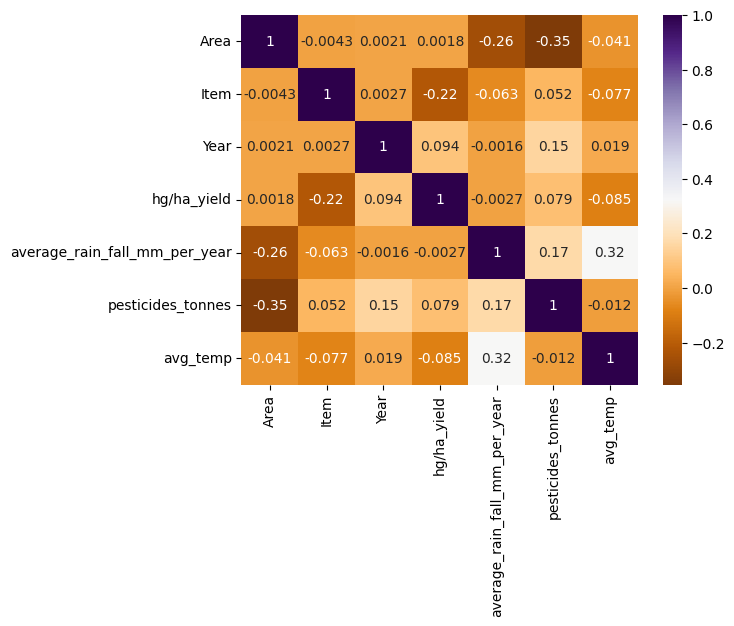

In [ ]:
sns.heatmap(datacorr.corr() , annot= True , cmap='PuOr')

<div style="border-radius:10px; padding: 15px; background-color: #854720; font-size:115%; text-align:left">

<h2 align="left"><font color=#9eb413>Inferences:</font></h2>

* __Area__: There's a strong correlation between __Area__ and __pesticides_tonnes__, along with __Area__ and __average rainfall__
    
    
* __Items__: There's a strong correlation between __Item__ and __hg/ha_yield__
    

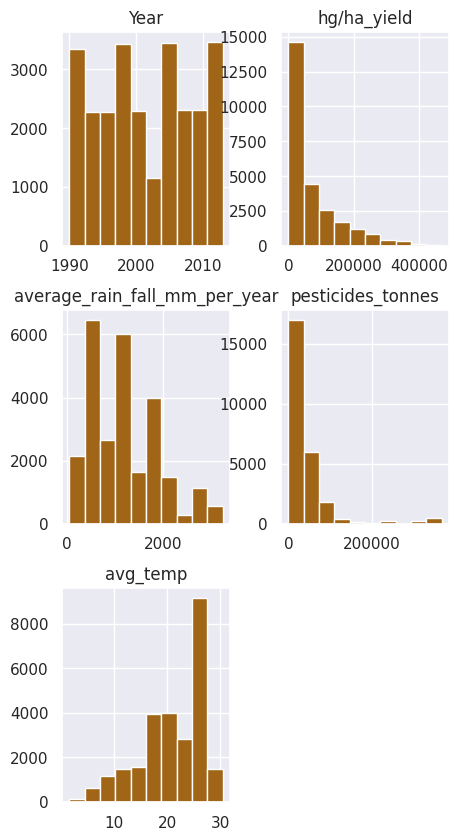

In [ ]:
sns.set(palette='BrBG')
df.hist(figsize=(5,10));

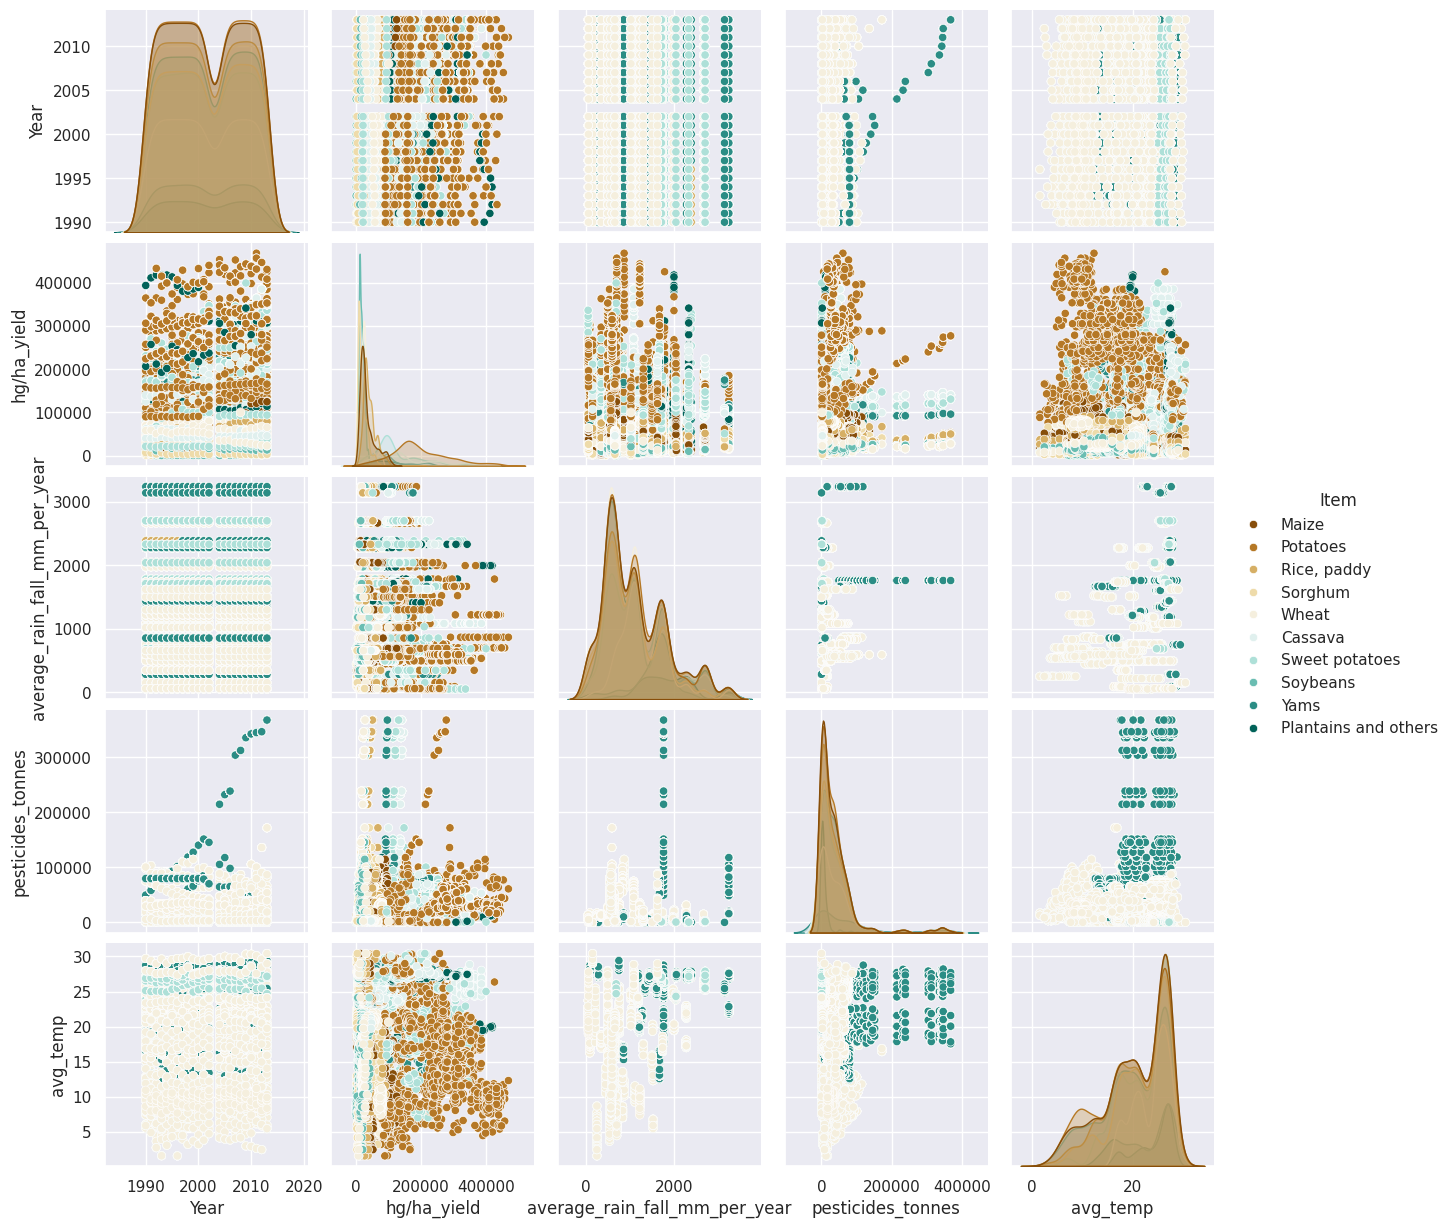

In [ ]:
sns.pairplot(data=df,hue='Item',kind='scatter',palette='BrBG')

<Axes: xlabel='Year'>

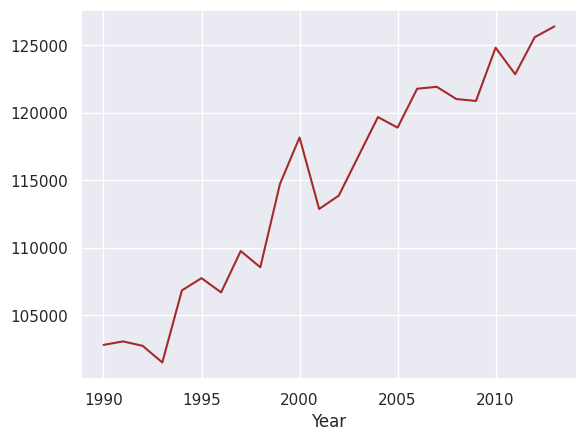

In [ ]:
df2=df[df['Item']=='Yams']
df2.groupby('Year')['hg/ha_yield'].mean().plot(color='brown')

In [ ]:
geojson_url = "https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson"
data = gpd.read_file(geojson_url)

merged_data = data.merge(df, left_on='NAME', right_on='Area', how='left')

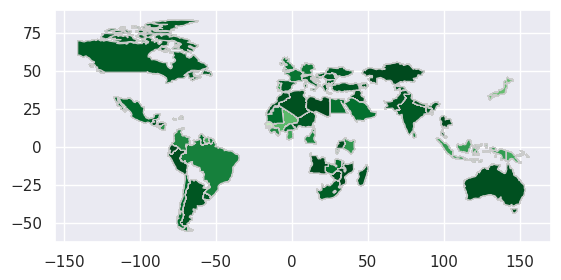

In [ ]:
# fig, ax = plt.subplots(figsize=(15, 10))
merged_data.plot( column='hg/ha_yield', cmap='Greens_r', linewidth=0.8, edgecolor='0.8')
# plt.title("Countries")
plt.show()

In [ ]:
del merged_data

In [ ]:
del data

In [ ]:
# import plotly.io as pio
# pio.renderers.default = 'notebook'

In [ ]:

# Define area_chunks before using it in the loop
unique_areas = df['Area'].unique()
chunk_size = len(unique_areas) // 7  # Divide areas into 7 chunks
area_chunks = [unique_areas[i:i + chunk_size] for i in range(0, len(unique_areas), chunk_size)]

for i in range(0,7):
    plot_df = df[df['Area'].isin(area_chunks[i])]
    dk=plot_df.groupby(['Area','Item'])['hg/ha_yield'].mean().to_frame()
    dg=dk.sort_values(by=['hg/ha_yield'],ascending=True)
    display(dg.head())



hg/ha_yield
Area       Item                 
Angola     Sorghum   2926.769231
Azerbaijan Sorghum   3324.166667
Angola     Soybeans  4235.538462
           Maize     5753.869565
Azerbaijan Soybeans  7599.850000

hg/ha_yield
Area                     Item                  
Ecuador                  Wheat      7111.956522
Cameroon                 Soybeans   7566.782609
Central African Republic Sorghum    9353.913043
                         Maize     10250.869565
Cameroon                 Sorghum   11521.304348

hg/ha_yield
Area     Item                 
Honduras Wheat     5574.130435
Haiti    Maize     7905.565217
         Sorghum   8157.913043
Ghana    Sorghum  10291.347826
Honduras Sorghum  10863.782609

hg/ha_yield
Area       Item                 
Madagascar Soybeans  6267.173913
           Sorghum   6452.304348
Kenya      Sorghum   7744.478261
India      Sorghum   8452.434783
Libya      Wheat     8459.521739

hg/ha_yield
Area       Item                
Niger      Sorghum  2592.913043
Mauritania Sorghum  4673.869565
Mozambique Sorghum  4830.304348
Malawi     Sorghum  6403.086957
Morocco    Sorghum  6594.739130

hg/ha_yield
Area     Item                  
Pakistan Sorghum    6056.043478
Rwanda   Soybeans   6664.869565
Senegal  Sorghum    8159.173913
Pakistan Soybeans   9276.000000
Rwanda   Sorghum   10969.478261

hg/ha_yield
Area       Item                 
Tajikistan Soybeans   941.750000
Zambia     Sorghum   6809.608696
Thailand   Wheat     7547.000000
Suriname   Soybeans  9039.869565
Sri Lanka  Sorghum   9177.521739

In [ ]:
for i in range(0,7):
    plot_df = df[df['Area'].isin(area_chunks[i])]
    dk=plot_df.groupby(['Area','Item'])['hg/ha_yield'].mean().to_frame()
    dg=dk.sort_values(by=['hg/ha_yield'],ascending=False)
    display(dg.head())

hg/ha_yield
Area      Item                         
Australia Potatoes        330944.826087
Argentina Potatoes        262059.173913
Australia Sweet potatoes  257610.826087
Brazil    Potatoes        196056.000000
Algeria   Potatoes        182413.956522

hg/ha_yield
Area        Item                               
Egypt       Sweet potatoes        261369.347826
            Potatoes              235444.956522
El Salvador Potatoes              211362.304348
            Plantains and others  198605.217391
Chile       Potatoes              184835.260870

hg/ha_yield
Area      Item                               
France    Potatoes              395037.260870
Germany   Potatoes              386553.347826
Guatemala Plantains and others  291096.304348
          Potatoes              241157.869565
Hungary   Potatoes              210372.782609

hg/ha_yield
Area  Item                         
Japan Potatoes        311005.260870
India Cassava         282234.434783
Italy Potatoes        237861.347826
Japan Sweet potatoes  237639.391304
      Yams            211343.434783

hg/ha_yield
Area      Item                         
Mexico    Potatoes        228553.695652
Morocco   Potatoes        217065.695652
Mauritius Potatoes        211356.869565
Mali      Potatoes        195653.869565
Mexico    Sweet potatoes  194611.913043

hg/ha_yield
Area             Item                   
South Africa     Potatoes  297195.434783
Spain            Potatoes  251421.695652
Saudi Arabia     Potatoes  223336.652174
Senegal          Potatoes  180499.608696
Papua New Guinea Yams      172521.173913

hg/ha_yield
Area           Item                               
United Kingdom Potatoes              406131.695652
Turkey         Potatoes              265486.565217
Suriname       Plantains and others  253966.913043
               Cassava               191282.478261
Tajikistan     Potatoes              176549.190476

In [ ]:
dk=df.groupby(['Area','Item'])['hg/ha_yield'].mean().to_frame()
dk.sort_values(by=['hg/ha_yield'],ascending=False)

hg/ha_yield
Area           Item                   
United Kingdom Potatoes  406131.695652
France         Potatoes  395037.260870
Germany        Potatoes  386553.347826
Australia      Potatoes  330944.826087
Japan          Potatoes  311005.260870
...                                ...
Zimbabwe       Sorghum     3864.956522
Azerbaijan     Sorghum     3324.166667
Angola         Sorghum     2926.769231
Niger          Sorghum     2592.913043
Tajikistan     Soybeans     941.750000

[495 rows x 1 columns]

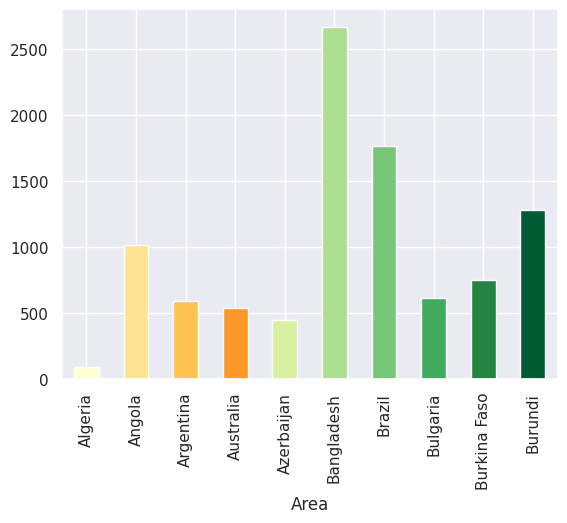

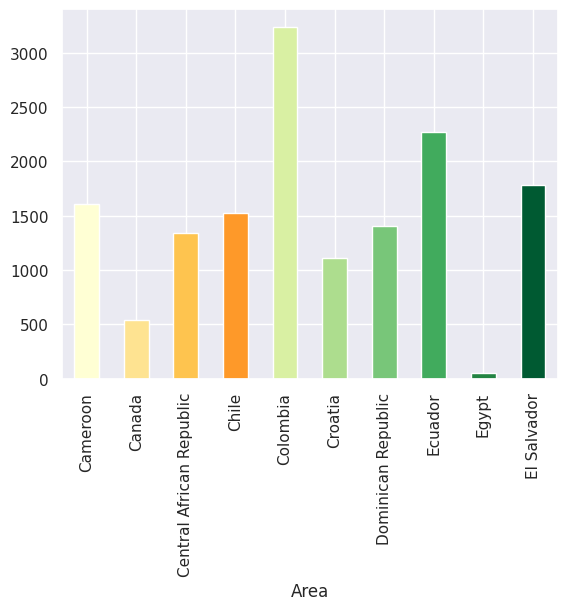

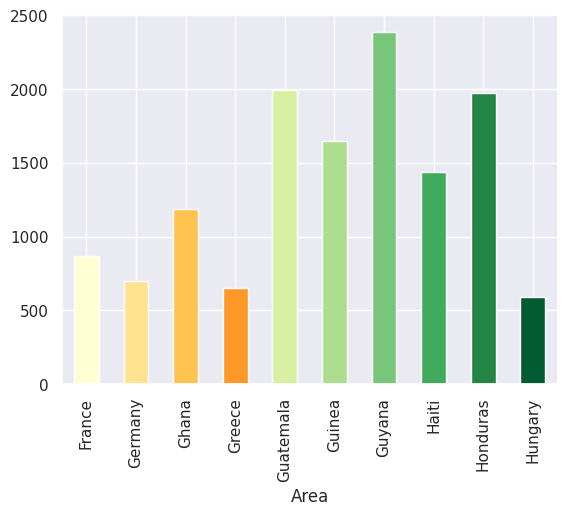

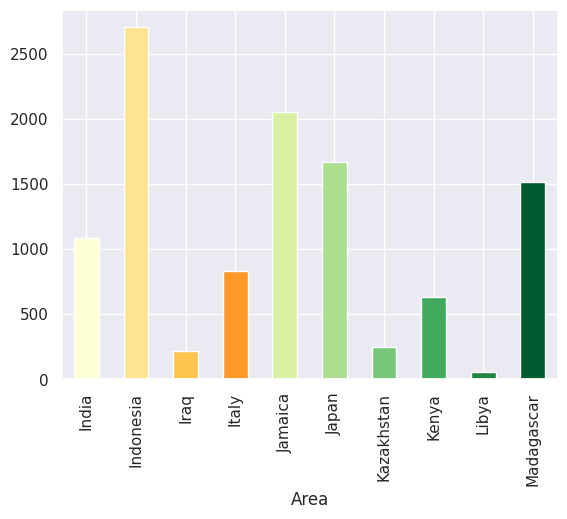

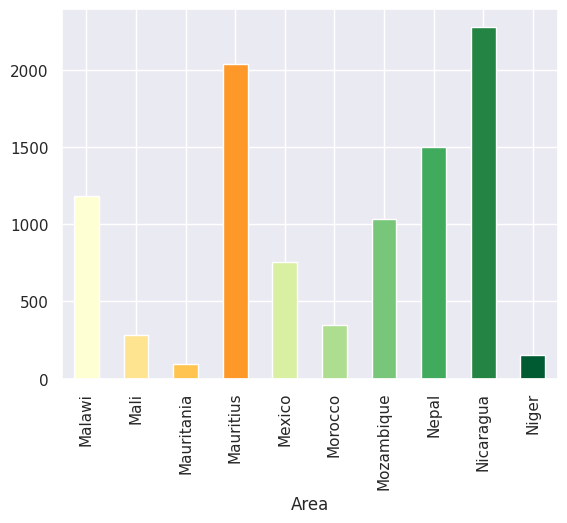

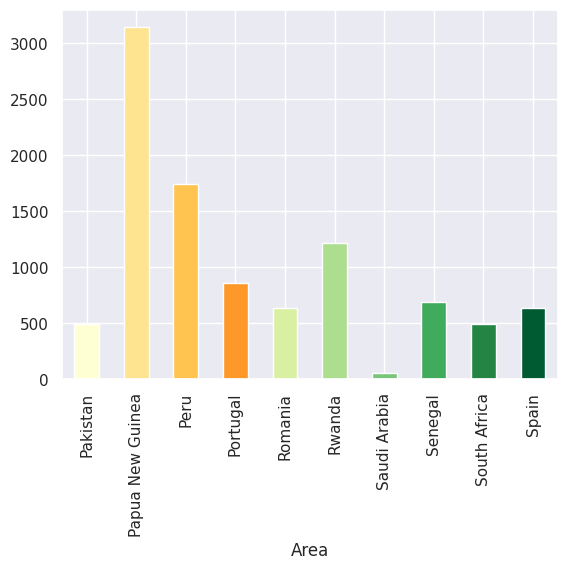

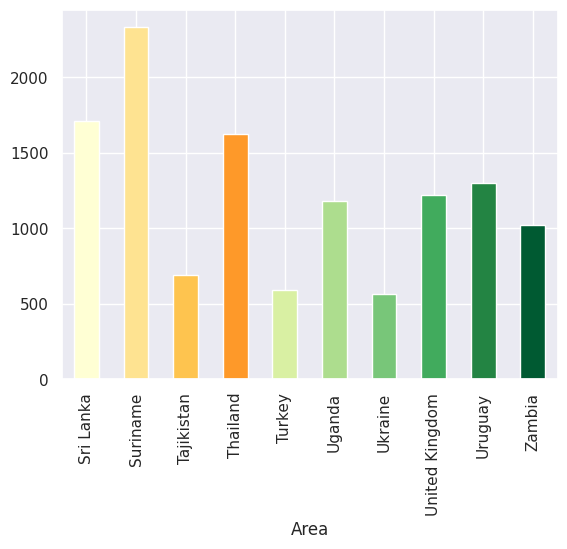

In [ ]:
for i in range(0,7):
    plot_df = df[df['Area'].isin(area_chunks[i])]
    plot_df.groupby(['Area'])['average_rain_fall_mm_per_year'].mean().plot(kind='bar',rot=0,color=colorss.greens)
    plt.xticks(rotation=90)
    plt.show()


<div style="border-radius:10px; padding: 15px; background-color: #854720; font-size:115%; text-align:left">

<h2 align="left"><font color=#9eb413>Inferences:</font></h2>
    
*  __Top__ rainfall countries: __Bangladesh, Colombia, Guyana, Indonesia, Nicaragua, Papua New Guinea, Ecuador, and Suriname__ have rainfall with **over** **2000** mm
* __Least__ rainfall countries: __Saudi Arabia, Pakistan, South Africa, Mali, Mauritania, Morocco, Niger, Libya, Iraq, Egypt, Azerbaijan,and Algeria__ have rainfall with **less** than **500** mm

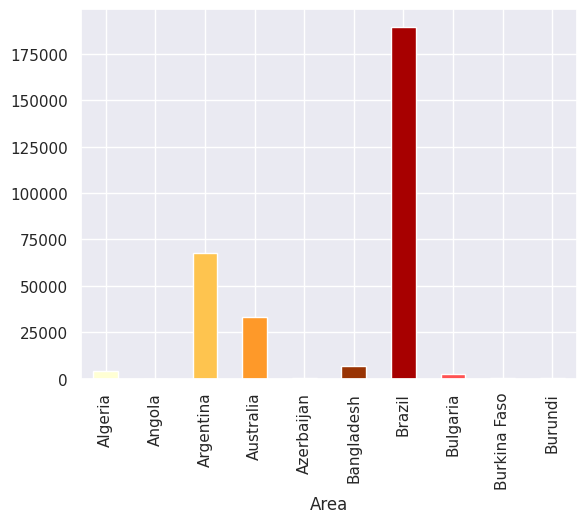

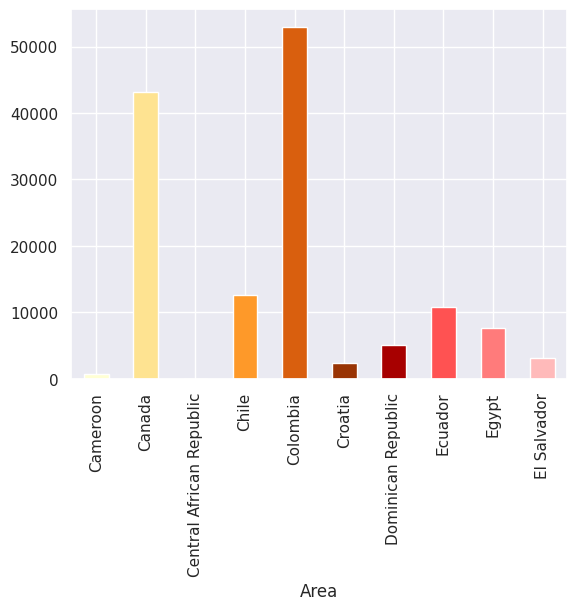

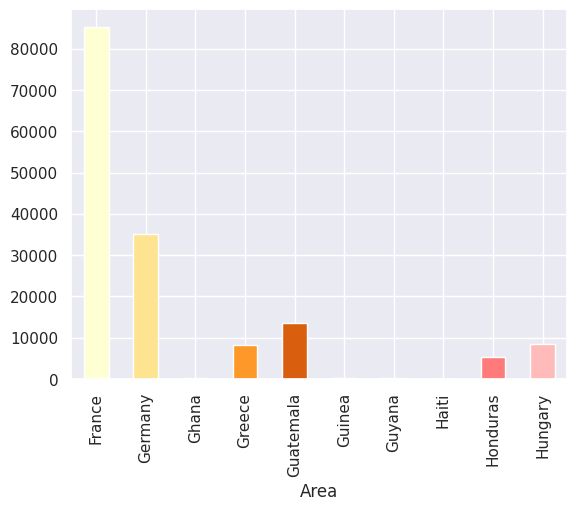

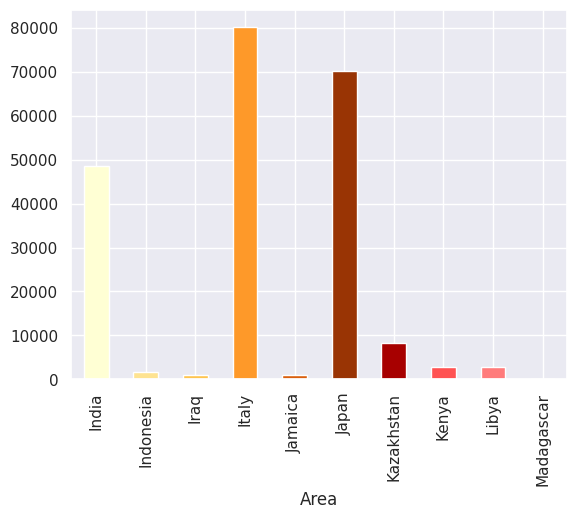

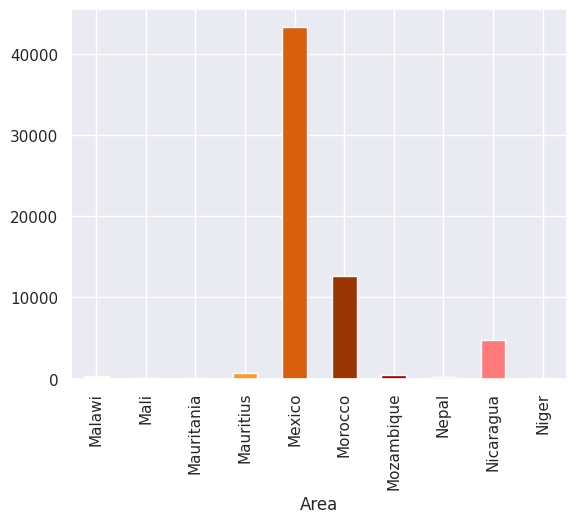

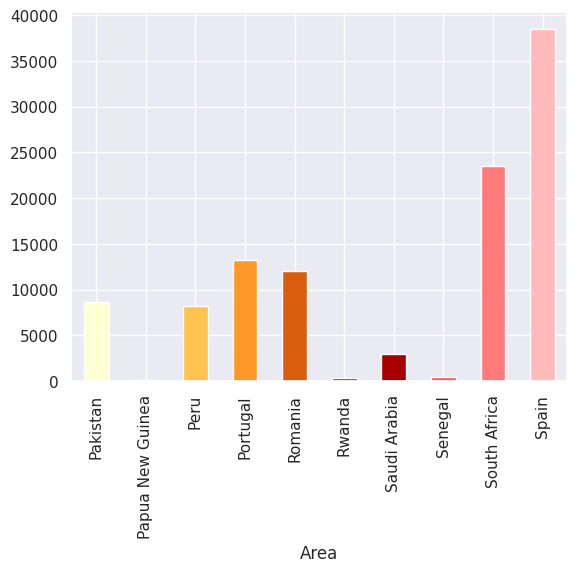

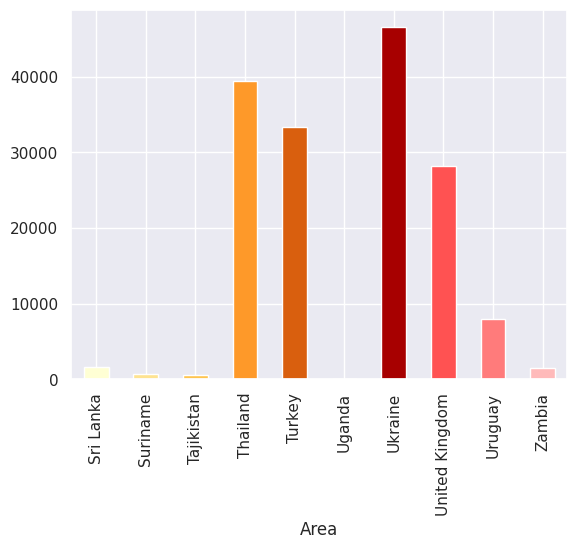

In [ ]:
for i in range(0,7):
    plot_df = df[df['Area'].isin(area_chunks[i])]
    plot_df.groupby(['Area'])['pesticides_tonnes'].mean().plot(kind='bar',rot=0,color=colorss.yellows)
    plt.xticks(rotation=90)
    plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #854720; font-size:115%; text-align:left">

<h2 align="left"><font color=#9eb413>Inferences:</font></h2>
    
*  __Top__ pesticides using countries: __Brazil, Italy, Argentina__
    >__France:__ For a high yield producing country, using over __80000__ tonnes of pesticides could be harmful.
> > __Japan:__ Another high producing country using over __60000__ tonnes of pesticides.
    
* __Least__ pesticides using countries: __Algeria, Angola, Azerbaijan, Bulgaria, Burkina Faso, Burundi, Cameroon, Cenrral African Republic, Croatia, Egypt, El Salvador,Greece, Guinea, Guyana, Haiti, Honduras, Hungary, Indonesia, Iraq, Jamaica, Kenya, Kazakhstan, Libya, Madagascar, Malawi, Mali, Mauritana, Mauritius, Mozambique, Nepal, Niger, Papua New Guinea, Rwanda, Senegal, Saudi Arabia, Sri Lanka, Suriname, Tajikistan, Uganda, Zambia, Zimbabwe, Uruguay__ have been using pesticides with less than 10000 tonnes
> All **poorly** producing yield countries are included in **least** pesticides usage countries    
* **Germany, Australia, and United Kingdom** are top producing countries and they use an average amount of pesticides around **30000** tonnes

<h2 align="left"><font color=#9eb413>Now this begs the question; do pesticides affect yield production?</font></h2>

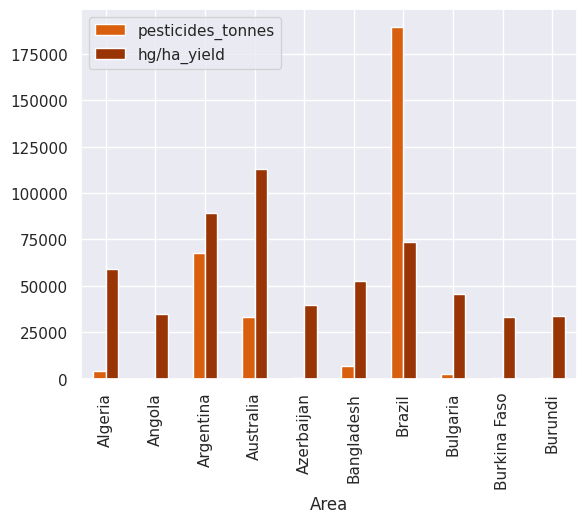

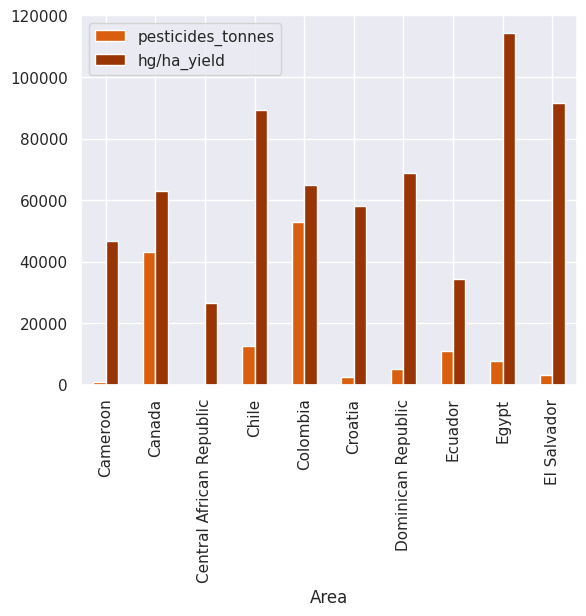

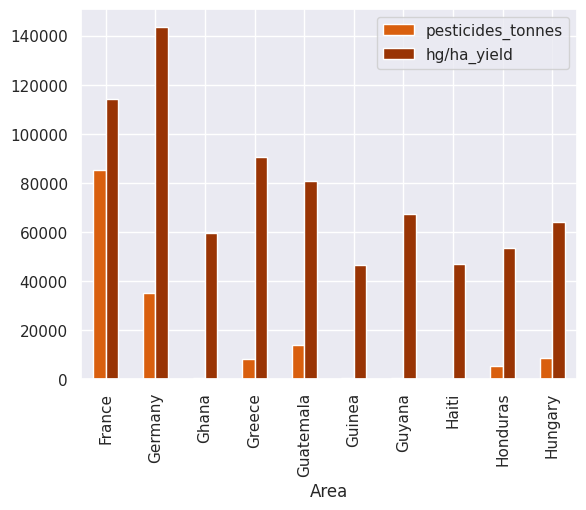

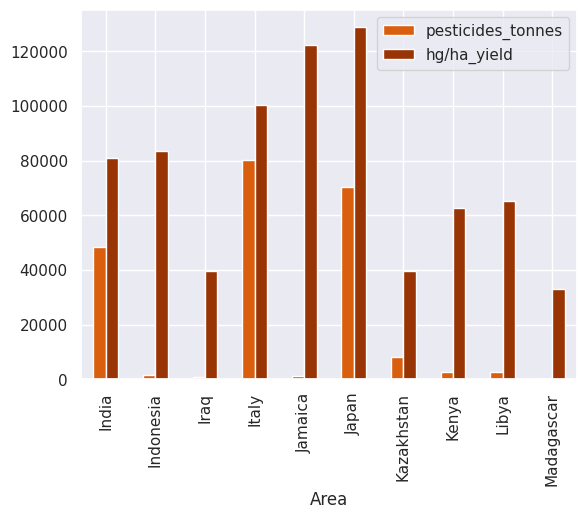

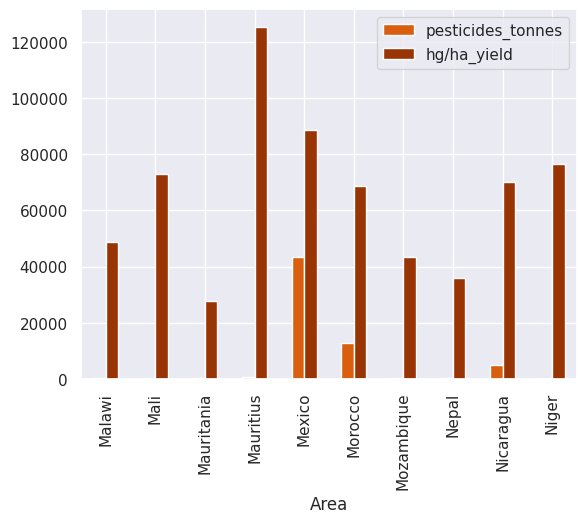

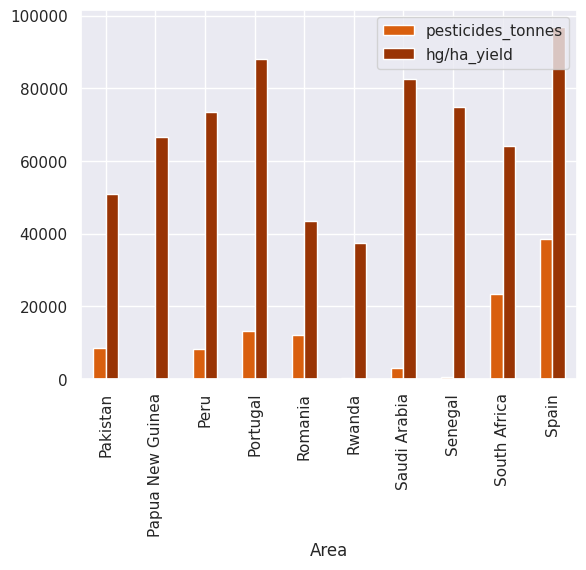

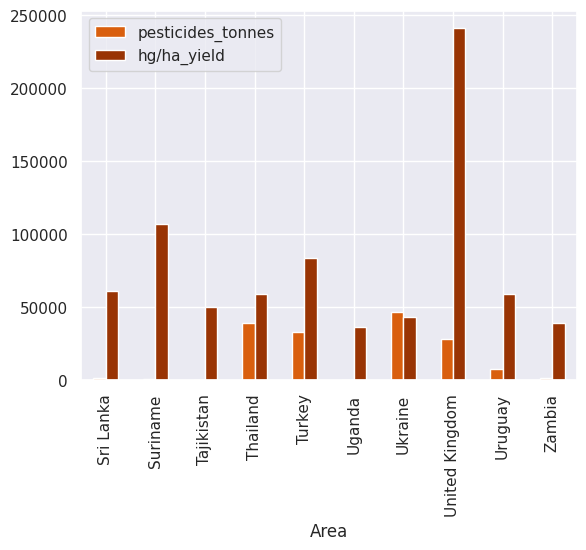

In [ ]:
for i in range(0,7):
    plot_df = df[df['Area'].isin(area_chunks[i])]
    plot_df.groupby('Area')[['pesticides_tonnes', 'hg/ha_yield']].mean().plot(kind='bar',rot=0,color=colorss.yellows[-6:])
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
px.scatter(df, x='hg/ha_yield', y='pesticides_tonnes',color="Area",color_discrete_sequence=colorss.greens)


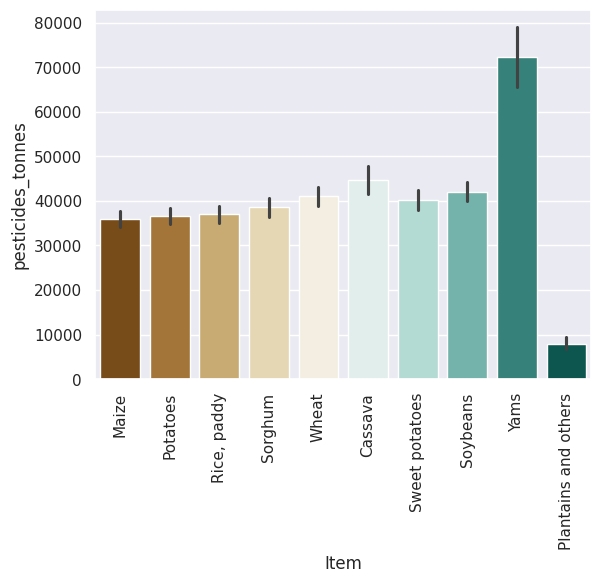

In [ ]:
sns.barplot(data=df, x = df.Item, y = df['pesticides_tonnes'],palette='BrBG')
plt.xticks(rotation=90)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #854720; font-size:115%; text-align:left">

<h2 align="left"><font color=#9eb413>Inferences:</font></h2>
    
*  __Top__ pesticides used on items: __Yams__
* __Least__ pesticides used on items: __Plantains and others__

<Axes: xlabel='Item', ylabel='hg/ha_yield'>

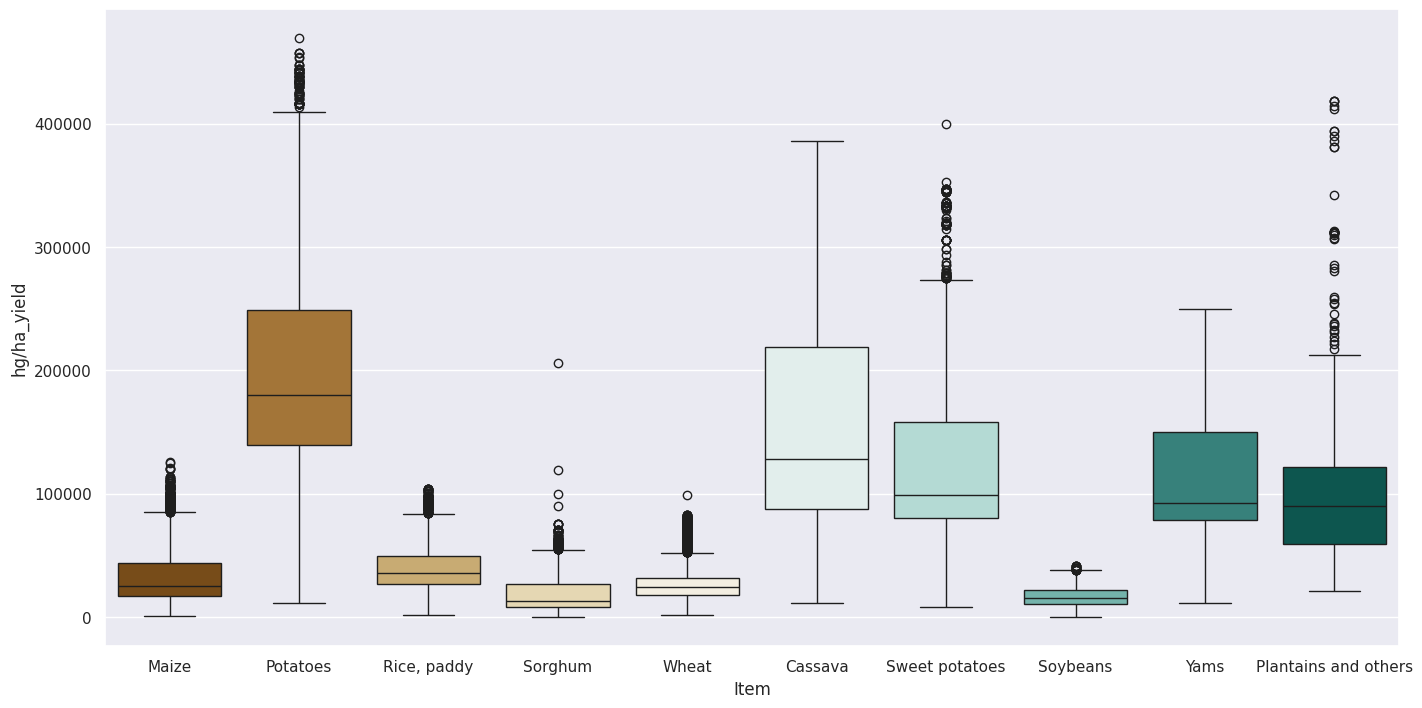

In [ ]:
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="Item",y="hg/ha_yield",palette="BrBG",data=df,ax=ax)

<div style="border-radius:10px; padding: 15px; background-color: #854720; font-size:115%; text-align:left">

<h2 align="left"><font color=#9eb413>Inferences:</font></h2>
    
*  __Top__ producing items: __potatoes, cassava__
* __Least__ producing items: __soybeans, sorghum, wheat, maize, and rice, paddy__

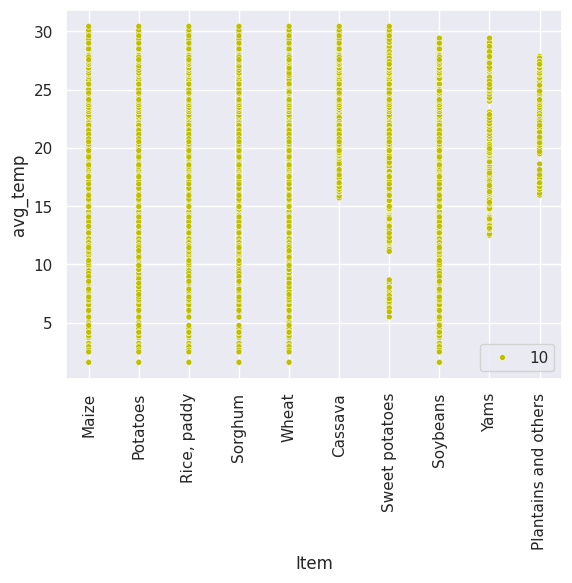

In [ ]:
sns.scatterplot(x = 'Item', y = 'avg_temp', data = df,size=10,color='y')
plt.xticks(rotation=90);

<div style="border-radius:10px; padding: 15px; background-color: #854720; font-size:115%; text-align:left">

<h2 align="left"><font color=#9eb413>Inferences:</font></h2>

* __Cassava, Yams, and Plantains and others__ need more than 15 avg temperature to grow
* __all__ other items can grow at any temperature range

In [ ]:
grouped = df.groupby('Item')

best_areas = []

for item, group in grouped:
    max_production_row = group[group['hg/ha_yield'] == group['hg/ha_yield'].max()]

    area = max_production_row['Area'].values[0]
    production = max_production_row['hg/ha_yield'].values[0]

    best_areas.append({'Item': item, 'Area': area, 'hg/ha_yield': production})

best_areas_df = pd.DataFrame(best_areas)

best_areas_df

Item        Area  hg/ha_yield
0               Cassava       India       385818
1                 Maize  Tajikistan       125670
2  Plantains and others   Guatemala       418505
3              Potatoes      France       468991
4           Rice, paddy   Australia       103895
5               Sorghum     Algeria       206000
6              Soybeans      Turkey        41609
7        Sweet potatoes     Senegal       400000
8                 Wheat      Zambia        99387
9                  Yams        Mali       250000

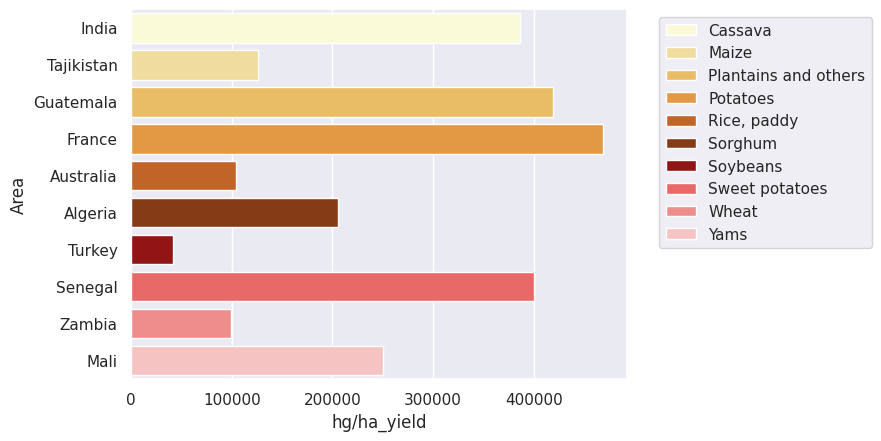

In [ ]:
ax=sns.barplot(data=best_areas_df,x='hg/ha_yield',y='Area',hue='Item',palette=colorss.yellows)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #854720; font-size:115%; text-align:left">

<h2 align="left"><font color=#9eb413>Inferences:</font></h2>

* __Cassava__: __India__ is the top at producing __Cassava__
* __Maize__: __Tajikistan__ excels at growing __Maize__
* __PLantains and others__: __Guatemala__ is the best source of __PLantains and others__
* __Potatoes__: __France__ is the top at producing __potatoes__
* __Rice, paddy__: __Australia__ is the leading country in producing __rice, paddy__
* __Sorghum__: __Algeria__ excels at producing __sorghum__
* __Soybeans__: __Turkey__ is unrivalled in producing __soybeans__
* __Sweet potatoes__: __Senegal__ is the best at producing __sweet potatoes__
* __Wheat__: __Zambbia__ surpasses every country at producing __wheat__
* __Yams__: __Mali__ outshines all countries in growing __yams__

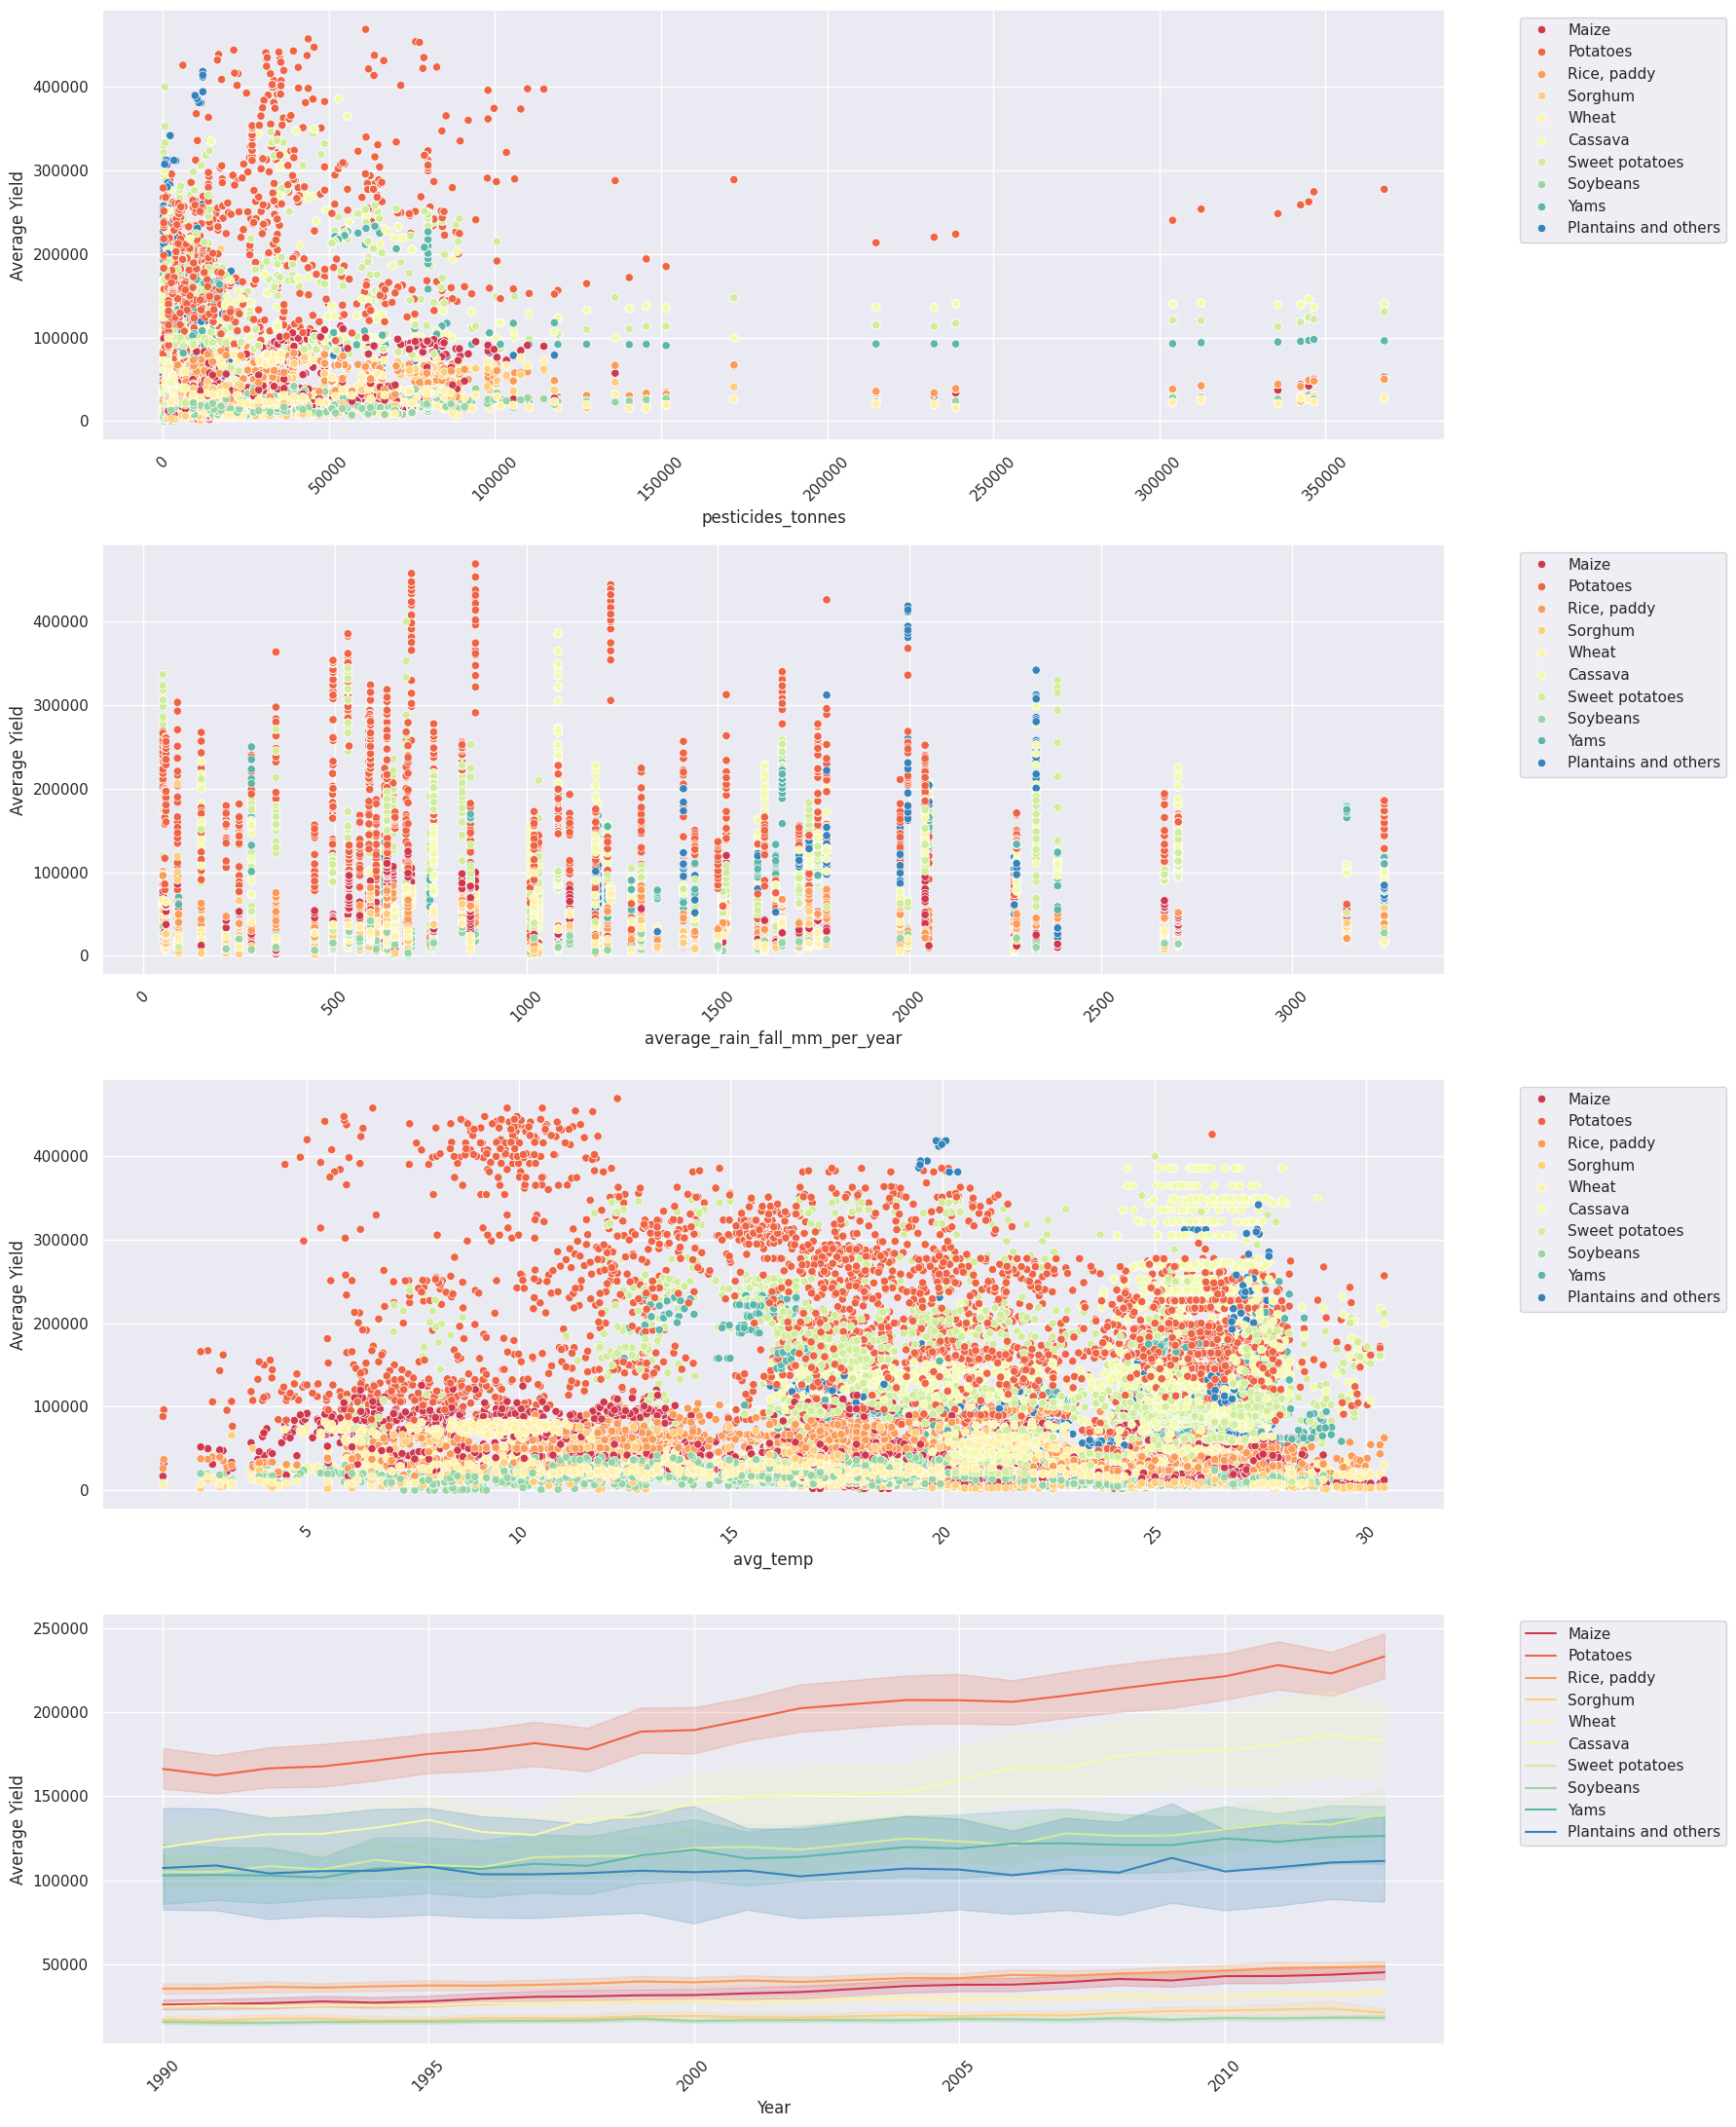

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(18, 22))

sns.scatterplot(x = "pesticides_tonnes", y = "hg/ha_yield", hue = "Item", data = df, ax=axes[0], legend = True,palette='Spectral')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylabel('Average Yield')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

sns.scatterplot(x = "average_rain_fall_mm_per_year", y = "hg/ha_yield", hue = "Item", data = df, ax=axes[1], legend = True,palette='Spectral')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylabel('Average Yield')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

sns.scatterplot(x = "avg_temp", y = "hg/ha_yield", hue = "Item", data = df, ax=axes[2], legend = True,palette='Spectral')
axes[2].tick_params(axis='x', rotation=45)
axes[2].set_ylabel('Average Yield')
axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

sns.lineplot(x = "Year", y = "hg/ha_yield", hue = "Item", data = df, ax=axes[3], legend = True,palette='Spectral')
axes[3].tick_params(axis='x', rotation=45)
axes[3].set_ylabel('Average Yield')
axes[3].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #854720; font-size:115%; text-align:left">

<h2 align="left"><font color=#9eb413>Inferences:</font></h2>
    
*  __pesticidies_tonnes__: it appears that production of items **decreases** as pesticides **increases**
* __rainfall__:  it appears that production of items **decreases** as rainfall **increases** for more than __2500__
* __avg_temp__: it shows that average yield **decreases** as average temperature **decreases** below __5__

    

In [ ]:
def change_of_years(data, template='seaborn'):
    col = data.columns[3:].tolist()
    for i in col:
        sns.lineplot(data.groupby(['Year'])[i].mean(),color='brown')
        plt.title=f'Effect of Years on the {i}'


        plt.show()
        yield()

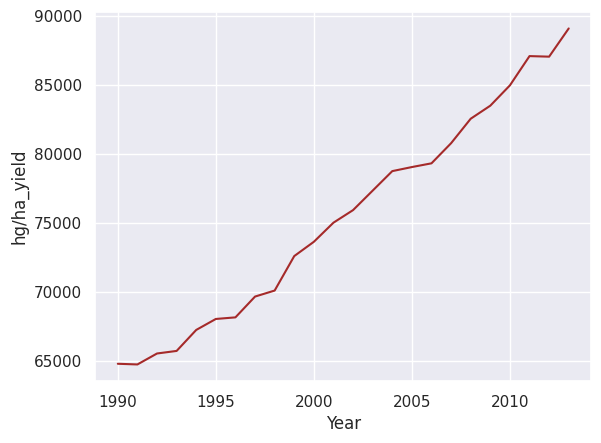

In [ ]:
yplot = change_of_years(df)
next(yplot);

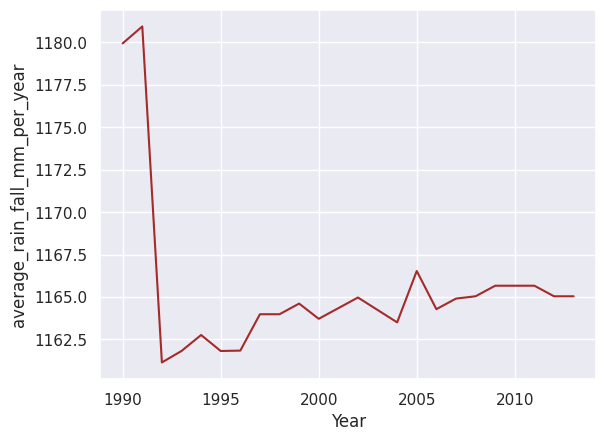

In [ ]:
next(yplot);

<div style="border-radius:10px; padding: 15px; background-color: #854720; font-size:115%; text-align:left">

<h2 align="left"><font color=#9eb413>Inferences:</font></h2>
    
*  __pesticides__ have been **increasing** significantly since __2003__
    
    

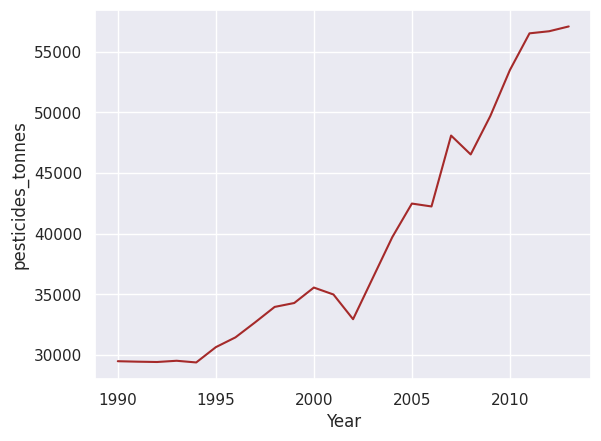

In [ ]:
next(yplot);

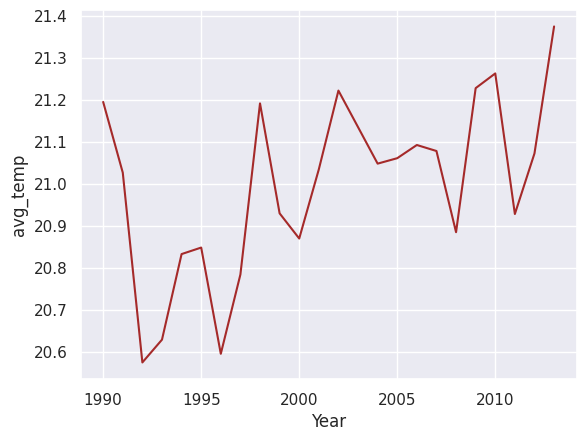

In [ ]:
next(yplot);

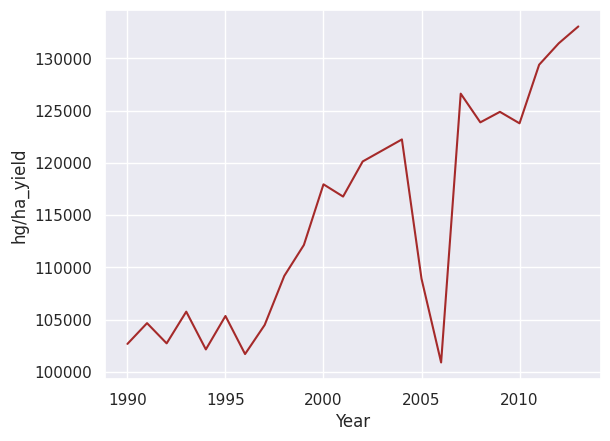

In [ ]:
df_Egypt = df.loc[df['Area'] == 'Egypt']
yplot = change_of_years(df_Egypt)
next(yplot);

<div style="border-radius:10px; padding: 15px; background-color: #854720; font-size:115%; text-align:left">

<h2 align="left"><font color=#9eb413>Inferences:</font></h2>
    
*  A significant __decrease__ in pesticides occurred between __1993-2005__ then it **increased** even higher than its starting value

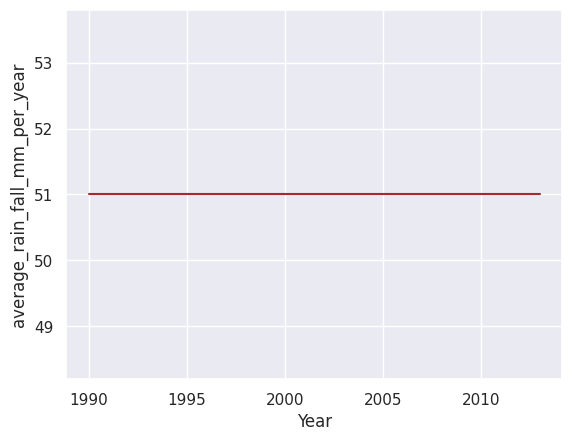

In [ ]:
next(yplot);

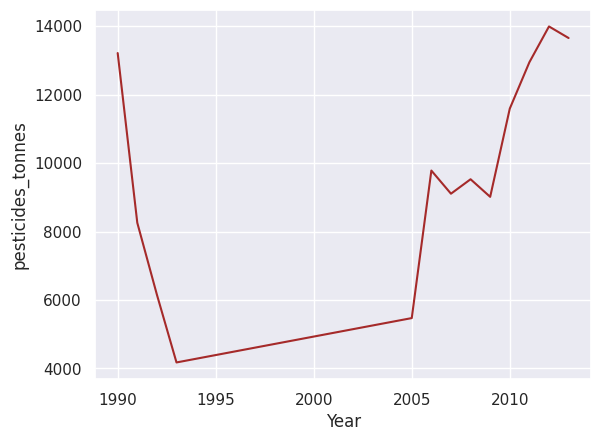

In [ ]:
next(yplot);

<a id="read"></a>
# <p style="background-color:#9eb413 ; font-family:calibri; color:#854720; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5 | Model building and evaluation</p>


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.6 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from catboost import CatBoostRegressor  # Replaced XGBRegressor with CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor


In [ ]:
X, y = datacorr.drop(labels='hg/ha_yield', axis=1), datacorr['hg/ha_yield']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

The accuracy of the Linear Regression Model Train is 7.39
The accuracy of the Linear Regression Model Test is 7.37


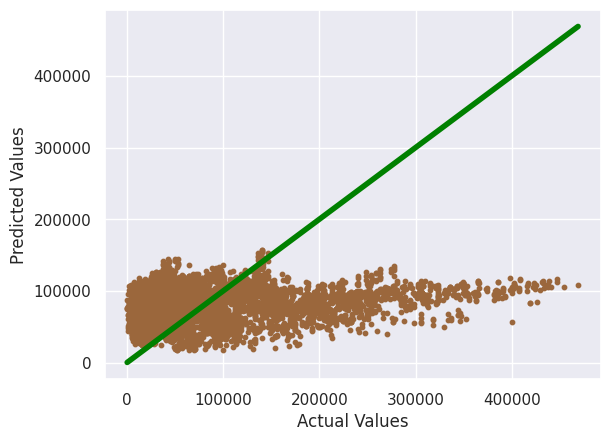

The accuracy of the Random Forest Model Train is 99.80
The accuracy of the Random Forest Model Test is 98.56


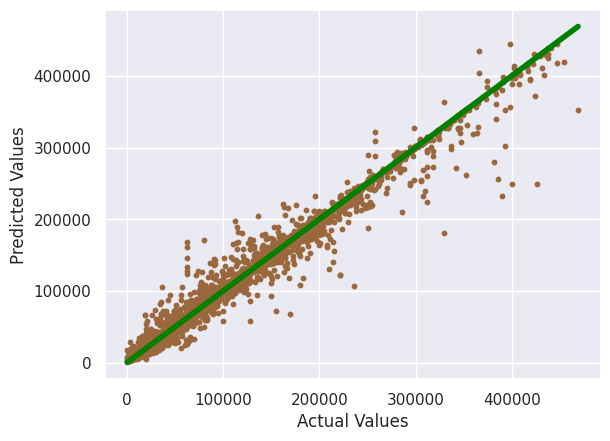

The accuracy of the Gradient Boost Model Train is 84.47
The accuracy of the Gradient Boost Model Test is 83.11


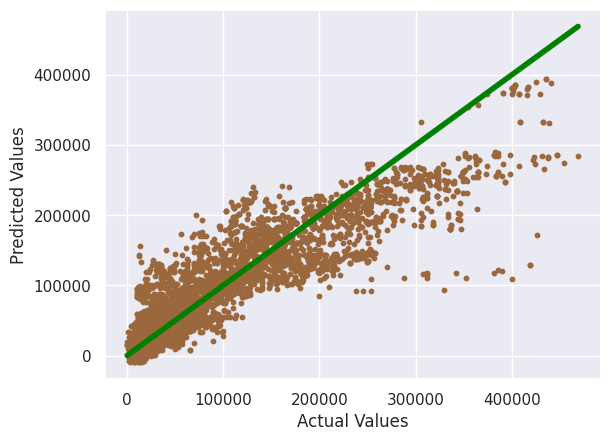

The accuracy of the CatBoost Model Train is 92.30
The accuracy of the CatBoost Model Test is 91.32


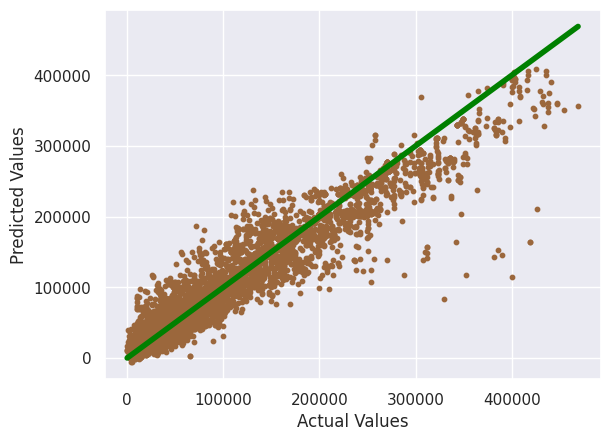

The accuracy of the KNN Model Train is 56.72
The accuracy of the KNN Model Test is 28.82


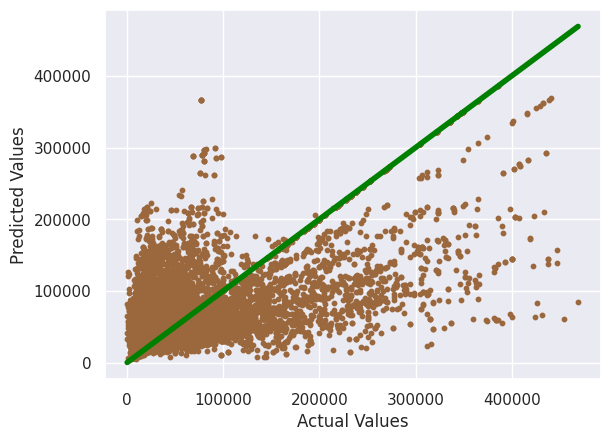

The accuracy of the Decision Tree Model Train is 100.00
The accuracy of the Decision Tree Model Test is 97.62


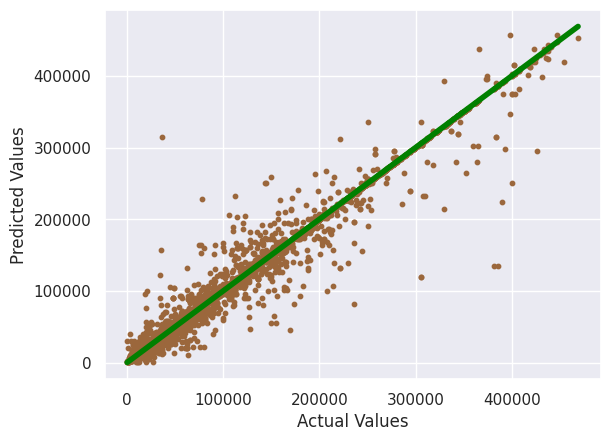

The accuracy of the Bagging Regressor Model Train is 99.81
The accuracy of the Bagging Regressor Model Test is 98.59


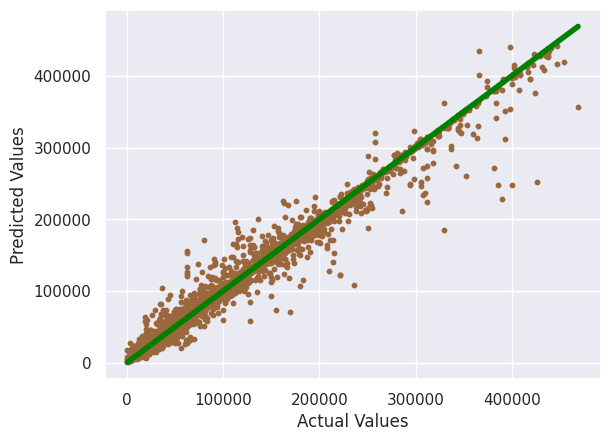

In [ ]:
from catboost import CatBoostRegressor

results = []

models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
    ('CatBoost', CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, random_state=42, silent=True)),  # Using CatBoost
    ('KNN', KNeighborsRegressor(n_neighbors=5)),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Bagging Regressor', BaggingRegressor(n_estimators=150, random_state=42))
]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, R2_score))

    acc = model.score(X_train, y_train) * 100
    print(f'The accuracy of the {name} Model Train is {acc:.2f}')

    acc = model.score(X_test, y_test) * 100
    print(f'The accuracy of the {name} Model Test is {acc:.2f}')

    plt.scatter(y_test, y_pred, s=10, color='#9B673C')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
#     plt.title(f' {name} Evaluation')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth=4)
    plt.show()

dff = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'R2_score'])
df_styled_best = dff.style.highlight_max(subset=['Accuracy', 'R2_score'], color='green') \
    .highlight_min(subset=['MSE'], color='green') \
    .highlight_max(subset=['MSE'], color='red') \
    .highlight_min(subset=['Accuracy', 'R2_score'], color='red')

display(df_styled_best)


# Kefold

In [ ]:
from catboost import CatBoostRegressor

results = []

models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
    ('CatBoost', CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, random_state=42, silent=True)),  # Using CatBoost
    ('KNN', KNeighborsRegressor(n_neighbors=5)),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Bagging Regressor', BaggingRegressor(n_estimators=150, random_state=42))
]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, MAE, MAPE, R2_score))

    print(name)
    num_folds = 5
    kf = KFold(n_splits=num_folds, shuffle=True)
    scores = cross_val_score(model, X, y, cv=kf)

    for fold, score in enumerate(scores):
        print(f"Fold {fold+1}: {score}")

    mean_score = np.mean(scores)
    print(f"Mean Score: {mean_score}")
    print('-'*30)


df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'MAE', 'MAPE', 'R2_score'])
df_styled_best = df.style.highlight_max(subset=['Accuracy', 'R2_score'], color='lightblue') \
    .highlight_min(subset=['MSE', 'MAE', 'MAPE'], color='lightblue') \
    .highlight_max(subset=['MSE', 'MAE', 'MAPE'], color='red') \
    .highlight_min(subset=['Accuracy', 'R2_score'], color='red')

display(df_styled_best)


Linear Regression
Fold 1: 0.06353544921824472
Fold 2: 0.06743696231136531
Fold 3: 0.08695611262453329
Fold 4: 0.07393140613432192
Fold 5: 0.0729717878963102
Mean Score: 0.07296634363695509
------------------------------
Random Forest
Fold 1: 0.9868602823012159
Fold 2: 0.9894291990338019
Fold 3: 0.9883101677684127
Fold 4: 0.9889116148563368
Fold 5: 0.9874004140920465
Mean Score: 0.9881823356103627
------------------------------
Gradient Boost
Fold 1: 0.8407890048107721
Fold 2: 0.8397430029783961
Fold 3: 0.8364988887174423
Fold 4: 0.8420357522303339
Fold 5: 0.8443717601652485
Mean Score: 0.8406876817804386
------------------------------
CatBoost
Fold 1: 0.9150384922467896
Fold 2: 0.9153723440248536
Fold 3: 0.917053683116074
Fold 4: 0.9171272822462944
Fold 5: 0.9155650116019167
Mean Score: 0.9160313626471857
------------------------------
KNN
Fold 1: 0.33367086492205633
Fold 2: 0.32725199587067433
Fold 3: 0.3598943116253238
Fold 4: 0.3569479506716424
Fold 5: 0.33841316582952474
Mean Score

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd

# Load dataset
df = pd.read_csv("yield_df.csv")

# Preprocessing
from sklearn.preprocessing import LabelEncoder
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

X, y = df.drop(labels='hg/ha_yield', axis=1), df['hg/ha_yield']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)),
    ('CatBoost', CatBoostRegressor(iterations=200, depth=8, learning_rate=0.05, random_state=42, silent=True)),
    ('KNN', KNeighborsRegressor(n_neighbors=3)),
    ('Decision Tree', DecisionTreeRegressor(max_depth=10, random_state=42)),
    ('Bagging Regressor', BaggingRegressor(n_estimators=200, random_state=42))
]

results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, R2_score))

# Convert results to DataFrame
df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'R2_score'])
print(df_results.sort_values(by='Accuracy', ascending=False))

               Model  Accuracy           MSE  R2_score
6  Bagging Regressor  0.986485  1.001722e+08  0.986485
1      Random Forest  0.972773  2.018097e+08  0.972773
5      Decision Tree  0.956589  3.217652e+08  0.956589
3           CatBoost  0.939633  4.474455e+08  0.939633
2     Gradient Boost  0.938964  4.524073e+08  0.938964
4                KNN  0.389365  4.526117e+09  0.389365
0  Linear Regression  0.086273  6.772676e+09  0.086273


In [ ]:
!pip install catboost

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint as sp_randint

# Define the parameter grids for each model
param_grid = {
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20],
        'min_samples_split': [2, 5]
    },
    'Gradient Boost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    },
    'CatBoost': {
        'iterations': [100, 200],
        'depth': [6, 8],
        'learning_rate': [0.05, 0.1]
    },
    'KNN': {
        'n_neighbors': [3, 5],
        'weights': ['uniform']
    },
    'Decision Tree': {
        'max_depth': [10, 20],
        'min_samples_split': [2, 5]
    },
    'Bagging Regressor': {
        'n_estimators': [100, 200],
        'max_samples': [0.7, 1.0]
    }
}

# Define the models
models = [
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boost', GradientBoostingRegressor(random_state=42)),
    ('CatBoost', CatBoostRegressor(random_state=42, silent=True)),
    ('KNN', KNeighborsRegressor()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Bagging Regressor', BaggingRegressor(random_state=42))
]

# Perform GridSearchCV and RandomizedSearchCV
results = []

for name, model in models:
    if name in param_grid:
        if name == 'Random Forest' or name == 'Gradient Boost' or name == 'Decision Tree':
            search = GridSearchCV(model, param_grid[name], cv=3, scoring='r2', n_jobs=-1)
        else:
            search = RandomizedSearchCV(model, param_distributions=param_grid[name], n_iter=10, cv=3, scoring='r2', random_state=42, n_jobs=-1)

        search.fit(X_train, y_train)
        best_model = search.best_estimator_
        y_pred = best_model.predict(X_test)
        accuracy = best_model.score(X_test, y_test)
        MSE = mean_squared_error(y_test, y_pred)
        R2_score = r2_score(y_test, y_pred)
        results.append((name, accuracy, MSE, R2_score))

        print(f'Best parameters for {name}: {search.best_params_}')
        print(f'The accuracy of the {name} Model Test is {accuracy:.2f}')
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = model.score(X_test, y_test)
        MSE = mean_squared_error(y_test, y_pred)
        R2_score = r2_score(y_test, y_pred)
        results.append((name, accuracy, MSE, R2_score))

        print(f'The accuracy of the {name} Model Test is {accuracy:.2f}')

# Convert results to DataFrame
df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'R2_score'])
print(df_results.sort_values(by='Accuracy', ascending=False))

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
The accuracy of the Random Forest Model Test is 0.99
Best parameters for Gradient Boost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
The accuracy of the Gradient Boost Model Test is 0.96
Best parameters for CatBoost: {'learning_rate': 0.1, 'iterations': 200, 'depth': 8}
The accuracy of the CatBoost Model Test is 0.96
Best parameters for KNN: {'weights': 'uniform', 'n_neighbors': 3}
The accuracy of the KNN Model Test is 0.39
Best parameters for Decision Tree: {'max_depth': 20, 'min_samples_split': 2}
The accuracy of the Decision Tree Model Test is 0.97
Best parameters for Bagging Regressor: {'n_estimators': 100, 'max_samples': 1.0}
The accuracy of the Bagging Regressor Model Test is 0.99
               Model  Accuracy           MSE  R2_score
5  Bagging Regressor  0.986512  9.997756e+07  0.986512
0      Random Forest  0.986472  1.002688e+08  0.986472
4      Decision Tree  0.9

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("yield_df.csv")

# Preprocessing
from sklearn.preprocessing import LabelEncoder
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

X, y = df.drop(labels='hg/ha_yield', axis=1), df['hg/ha_yield']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define individual models
rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
gb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)
cb = CatBoostRegressor(iterations=200, depth=8, learning_rate=0.05, random_state=42, silent=True)
dl = DecisionTreeRegressor(max_depth=10, random_state=42)
knn = KNeighborsRegressor(n_neighbors=3)

# Hybrid Voting Regressor
voting_regressor = VotingRegressor(estimators=[
    ('Random Forest', rf),
    ('Gradient Boost', gb),
    ('CatBoost', cb),
    ('Decision Tree', dl),
    ('KNN', knn)
])

# Train the Voting Regressor
voting_regressor.fit(X_train, y_train)

# Predict
y_pred = voting_regressor.predict(X_test)

# Evaluate
accuracy = voting_regressor.score(X_test, y_test)
MSE = mean_squared_error(y_test, y_pred)
R2_score = r2_score(y_test, y_pred)

print(f'Voting Regressor Accuracy: {accuracy:.2f}')
print(f'Mean Squared Error: {MSE:.2f}')
print(f'R2 Score: {R2_score:.2f}')


Voting Regressor Accuracy: 0.94
Mean Squared Error: 471184910.53
R2 Score: 0.94


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 18.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=54c4be1bcdf244f519a82521834aece610c9c87e19662b3a43d0eafd380e6229
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
from lime.lime_tabular import LimeTabularExplainer

# Load dataset
df = pd.read_csv("yield_df.csv")

# Preprocessing
from sklearn.preprocessing import LabelEncoder
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

X, y = df.drop(labels='hg/ha_yield', axis=1), df['hg/ha_yield']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define individual models
rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
gb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)
cb = CatBoostRegressor(iterations=200, depth=8, learning_rate=0.05, random_state=42, silent=True)
dl = DecisionTreeRegressor(max_depth=10, random_state=42)
knn = KNeighborsRegressor(n_neighbors=3)

# Hybrid Voting Regressor
voting_regressor = VotingRegressor(estimators=[
    ('Random Forest', rf),
    ('Gradient Boost', gb),
    ('CatBoost', cb),
    ('Decision Tree', dl),
    ('KNN', knn)
])

# Train the Voting Regressor
voting_regressor.fit(X_train, y_train)

# Predict
y_pred = voting_regressor.predict(X_test)

# Evaluate
accuracy = voting_regressor.score(X_test, y_test)
MSE = mean_squared_error(y_test, y_pred)
R2_score = r2_score(y_test, y_pred)

print(f'Voting Regressor Accuracy: {accuracy:.2f}')
print(f'Mean Squared Error: {MSE:.2f}')
print(f'R2 Score: {R2_score:.2f}')

# Train RandomForestRegressor separately for LIME analysis
rf.fit(X_train, y_train)

# LIME Analysis on RandomForestRegressor
explainer = LimeTabularExplainer(X_train.values, feature_names=X.columns.tolist(), mode='regression')
i = np.random.randint(0, X_test.shape[0])
exp = explainer.explain_instance(X_test.iloc[i].values, rf.predict)
exp.show_in_notebook()


Voting Regressor Accuracy: 0.94
Mean Squared Error: 471184910.53
R2 Score: 0.94
